In [1]:
# se importan las librerias 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel(r"C:\Users\Alvaro\OneDrive\Documentos\Primer proyecto\codigo\new-proyect\Data\Data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   APPLE      251 non-null    float64       
 2   MICROFT    251 non-null    float64       
 3   GOOGLE     251 non-null    float64       
 4   NVIDIA     251 non-null    float64       
 5   NIKE       251 non-null    float64       
 6   NASDAQ     251 non-null    float64       
 7   S&P 500    251 non-null    float64       
 8   PETROLEO   251 non-null    float64       
 9   ORO        251 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 19.7 KB


In [5]:
df

,Date,APPLE,MICROFT,GOOGLE,NVIDIA,NIKE,NASDAQ,S&P 500,PETROLEO,ORO
0,2022-10-06,145.429993,246.789993,102.239998,120.760002,90.169998,11073.309570,3744.52,88.45,1710.85
1,2022-10-07,140.089996,234.240005,99.570000,116.699997,87.160004,10652.400391,3639.66,92.64,1694.52
2,2022-10-10,140.419998,229.250000,98.709999,115.860001,86.690002,10542.099609,3612.39,91.13,1667.96
3,2022-10-11,138.979996,225.410004,98.050003,115.000000,87.989998,10426.190430,3588.84,89.35,1665.31
4,2022-10-12,138.339996,225.750000,98.300003,119.599998,88.510002,10417.099609,3577.03,87.27,1672.51
...,...,...,...,...,...,...,...,...,...,...
246,2023-09-29,171.210007,315.750000,131.850006,447.820007,95.620003,13219.320313,4288.05,90.79,1848.31
247,2023-10-02,173.750000,321.799988,135.169998,435.170013,94.559998,13307.769531,4288.39,88.82,1827.40
248,2023-10-03,172.399994,313.390015,133.300003,440.410004,95.089996,13059.469727,4229.45,89.23,1822.81
249,2023-10-04,173.660004,318.959991,136.270004,446.880005,95.889999,13236.009766,4263.75,84.22,1821.08


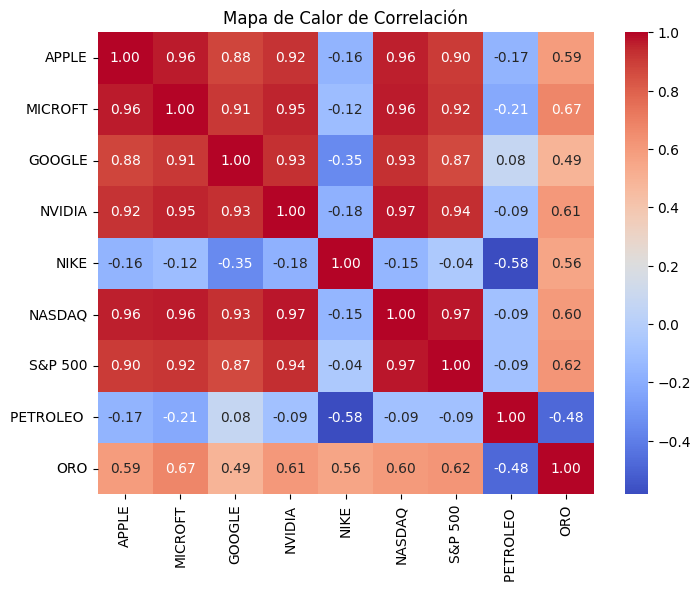

In [7]:
# Filter only the numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()